# AEROFIT Business Case - Descriptive Statistics & Probability

### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\n.rahman\OneDrive - BALADNA\Desktop\BALADNA\Ex Docs\SCALER-DSML\Module 6 - DAV - Pandas\aerofit_treadmill.csv")

In [4]:
df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
29,KP281,25,Female,14,Partnered,2,2,53439,47
166,KP781,29,Male,14,Partnered,7,5,85906,300
53,KP281,30,Male,14,Partnered,4,4,46617,141
124,KP481,33,Female,18,Single,3,4,47754,74
116,KP481,31,Female,16,Partnered,2,3,51165,64


## DATA ANALYSIS & PLOTS

###  Basic EDA - shape,info, basic stats, attributes value counts¶, null values, outliers

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [16]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [18]:
df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [19]:
df.isnull().sum() # no null values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [20]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observation**

- Across all columns we dont really see there is major difference between the mean and median(50%) indicating that the data variability or spread is relatively symmetric with no significant skewed outliers pulling the mean away from the median.
- Attributes Income and Miles have slight difference between mean and median indicating some potential customers who earns more and run extra miles as an outliers. This need to further analyse.
- It just means that any outliers that exist are balanced in such a way that they don't skew the mean significantly compared to the median.
- Lets randomly boxplot for some of the attributes 

<Axes: >

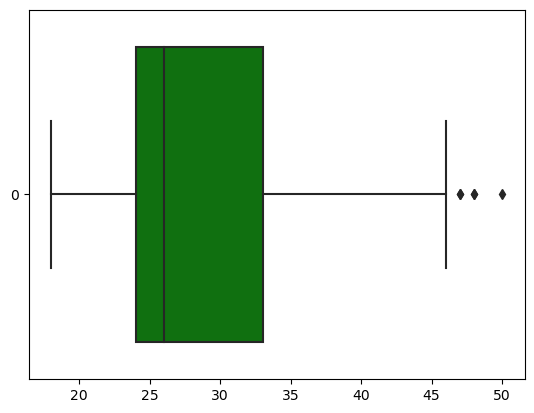

In [21]:
sns.boxplot(df["Age"],color = 'g',orient ="h")

<Axes: xlabel='Age', ylabel='Density'>

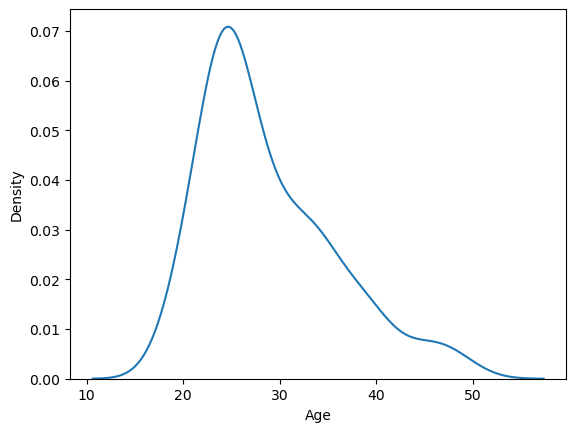

In [23]:
sns.kdeplot(df["Age"])

#### Calculating the Age percentiles and IQR

In [24]:
age_75 = np.percentile(df["Age"],75)
age_25 = np.percentile(df["Age"],25)
age_75,age_25

(33.0, 24.0)

In [25]:
age_iqr = age_75-age_25
age_iqr

9.0

In [26]:
upper_whisker_age = age_75 + 1.5*age_iqr
upper_whisker_age

46.5

In [27]:
lower_whisker_age = age_25 - 1.5*age_iqr
lower_whisker_age

10.5

**Observation**

- We observed the IQR of age is 9 indicating the ages of the middle 50% of people fall within a 9-year range(from 24 to 33 years)
- So from above age boxplot we see the outliers exist as data points that lie beyond 1.5 times the interquartile range (IQR) from the first and third quartiles.
- Upper whisker point = 46.5
- Lower whisker point = 10.5
- Any data point outside these bounds is considered an outlier.

<Axes: >

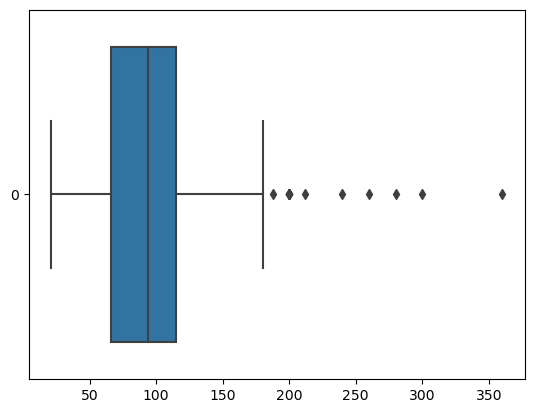

In [28]:
sns.boxplot(df["Miles"],orient="h")

<Axes: >

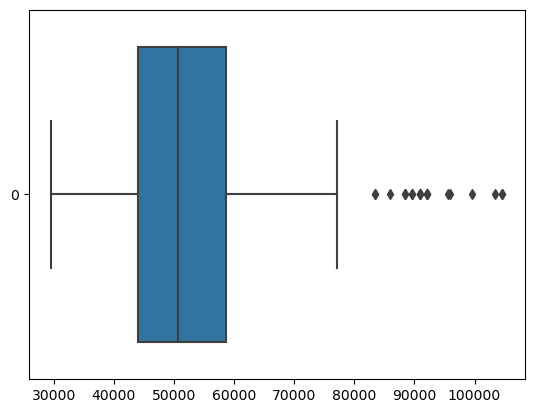

In [29]:
sns.boxplot(df["Income"],orient="h")

----------------------------------------------------------------------------------------------------------------------------

In [30]:
vc = df["Product"].value_counts().reset_index()
vc

,Product,count
0,KP281,80
1,KP481,60
2,KP781,40


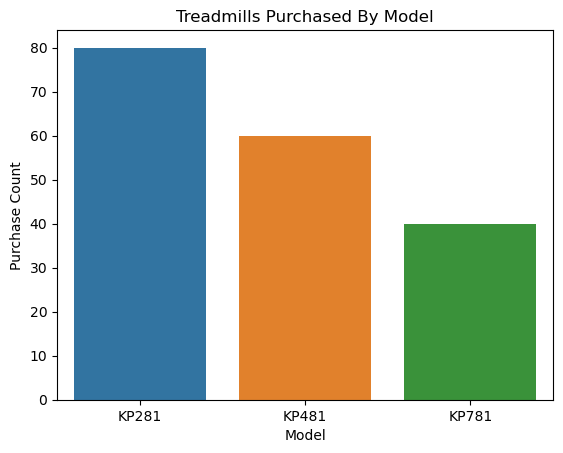

In [31]:
sns.barplot(x = "Product", y="count",data = vc)
plt.title("Treadmills Purchased By Model")
plt.xlabel("Model")
plt.ylabel("Purchase Count")
plt.show()

## INSIGHTS Plot 1- This indicates the majority of purchase made on entry level treadmill(KP281) followed by mid-level runners(KP481) and the one with advanced features (KP781). 

In [32]:
by_age = df.groupby(["Age"])["Product"].count().reset_index().sort_values("Product",ascending=False)
by_age

,Age,Product
7,25,25
5,23,18
6,24,12
8,26,12
10,28,9
17,35,8
15,33,8
12,30,7
20,38,7
3,21,7


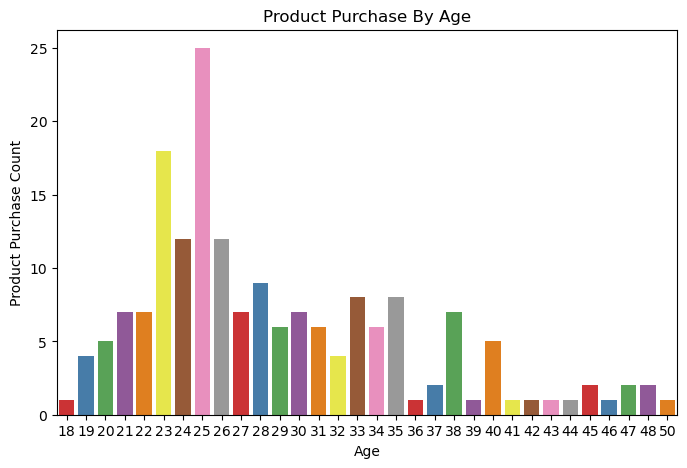

In [164]:
plt.figure(figsize=(8,5))
sns.barplot(data=by_age,x="Age",y="Product",palette="Set1")
plt.title("Product Purchase By Age")
plt.ylabel("Product Purchase Count")
plt.show()

###  INSIGHTS Plot 2- The Age group of 25 has purchased the highest number of treadmills compared to all other age groups, followed by ages 23, 24, and 26.

In [39]:
by_age_product = df.groupby(["Age","Product"]).size().reset_index(name="count").sort_values("count",ascending=False).head(20)
by_age_product

,Age,Product,count
16,25,KP481,11
9,23,KP281,8
17,25,KP781,7
18,26,KP281,7
15,25,KP281,7
10,23,KP481,7
24,28,KP281,6
12,24,KP281,5
38,33,KP481,5
7,22,KP281,4


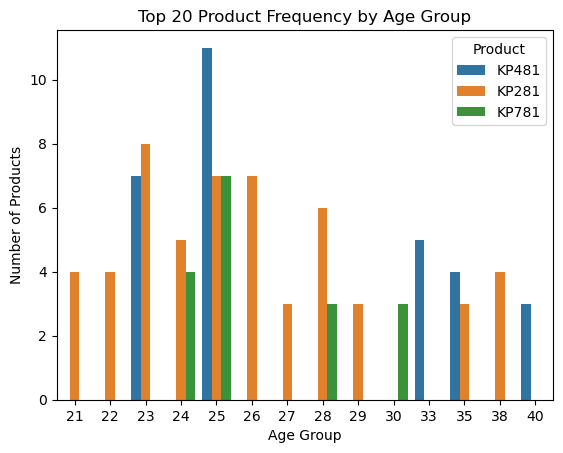

In [40]:
sns.barplot(x="Age",y="count",hue = "Product", data= by_age_product)
plt.xlabel("Age Group")
plt.ylabel("Number of Products")
plt.title("Top 20 Product Frequency by Age Group")
plt.xticks(rotation=0)
plt.show()

###  INSIGHTS Plot 3- By product type, the Age group of 25 dominates the purchase followed by the age group 23 and 26.  Among age group 25, the mid model is the most purchased in high numbers followed by other 2 models. Age group 23 have high purchased on entry model followed by mid model. No purchase of advanced model. Whereas age group 26 have all purchased the mid model. 

In [41]:
by_gender_product = df.groupby(["Gender","Product"]).size().reset_index(name="count").sort_values("count",ascending=False)
by_gender_product

,Gender,Product,count
0,Female,KP281,40
3,Male,KP281,40
5,Male,KP781,33
4,Male,KP481,31
1,Female,KP481,29
2,Female,KP781,7


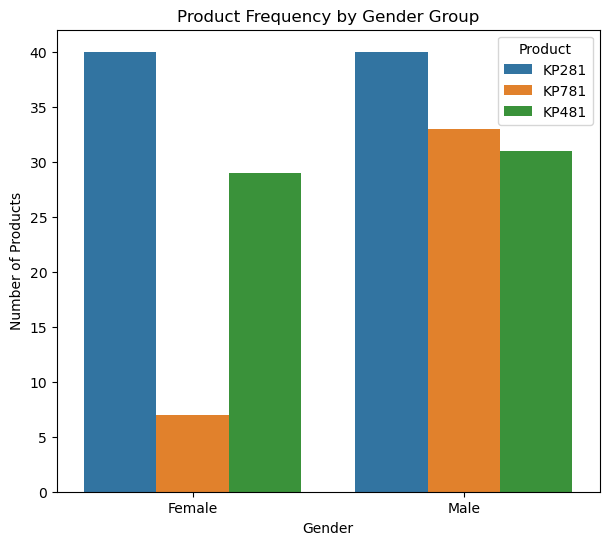

In [42]:
plt.figure(figsize=(7,6))
sns.barplot(x="Gender",y="count",hue = "Product", data= by_gender_product)
plt.xlabel("Gender")
plt.ylabel("Number of Products")
plt.title("Product Frequency by Gender Group")
plt.xticks(rotation=0)
plt.show()

### INSIGHTS Plot 4- Male gender dominates more purchase among all type of treadmills. But there is equal purchase happend among entry model from both gender group. This indicates the most prefered model is the entry level.

In [43]:
by_marital_product = df.groupby(["MaritalStatus","Product"]).size().reset_index(name="count").sort_values("count",ascending=False).head(10)
by_marital_product

,MaritalStatus,Product,count
0,Partnered,KP281,48
1,Partnered,KP481,36
3,Single,KP281,32
4,Single,KP481,24
2,Partnered,KP781,23
5,Single,KP781,17


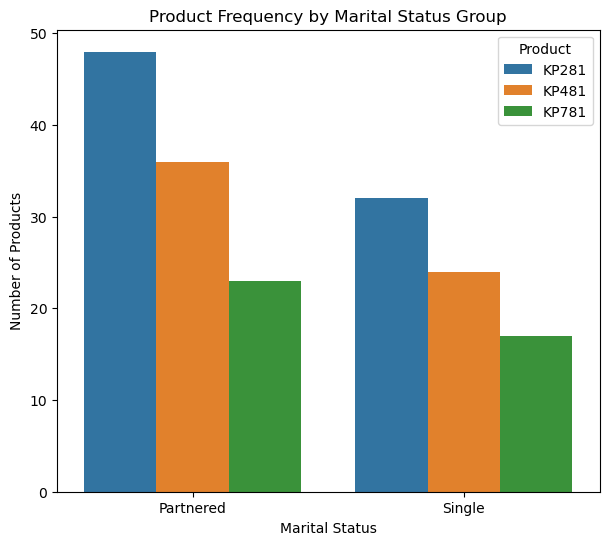

In [44]:
plt.figure(figsize=(7,6))
sns.barplot(x="MaritalStatus",y="count",hue = "Product", data= by_marital_product)
plt.xlabel("Marital Status")
plt.ylabel("Number of Products")
plt.title("Product Frequency by Marital Status Group")
plt.xticks(rotation=0)
plt.show()

### INSIGHTS Plot 5- Partnered dominates more purchase among all type of treadmills.  This indicates the most prefered model among parterners is the entry level model followed by mid and advanced models.

In [46]:
df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
53,KP281,30,Male,14,Partnered,4,4,46617,141
114,KP481,30,Female,13,Single,4,3,46617,106
179,KP781,48,Male,18,Partnered,4,5,95508,180
142,KP781,22,Male,18,Single,4,5,48556,200
165,KP781,29,Male,18,Single,5,5,52290,180


# Contigency Table Analysis

### Purchasing Trends of KP281, KP481, KP781 models By Age,Marital Status, Age, Education & Income

### Gender

In [47]:
pd.crosstab(df["Gender"],df["Product"],margins=True, margins_name="Total")

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


#### KP281

In [48]:
pf_281 = np.round((80/180)*100,2) #KP281 model
pf_281

44.44

In [49]:
pf_281_f = np.round((40/80)*100,2) #KP281 and Female
pf_281_f

50.0

In [50]:
pf_281_m = np.round((40/80)*100,2) #KP281 and Male
pf_281_m

50.0

----------------------------------------------------------------------------------------------------------------------------

#### KP481

In [51]:
pf_481 = np.round((60/180)*100,2)
pf_481

33.33

In [52]:
pf_481_f = np.round((29/60)*100,2)
pf_481_f

48.33

In [53]:
pf_481_m = np.round((31/60)*100,2)
pf_481_m

51.67

---------------------------------------------------------------------------------------------------------------------------

#### KP781

In [54]:
pf_781 = np.round((40/180)*100,2)
pf_781

22.22

In [55]:
pf_781_f = np.round((7/40)*100,2)
pf_781_f

17.5

In [56]:
pf_781_m = np.round((33/40)*100,2)
pf_781_m

82.5

---------------------------------------------------------------------------------------------------------------------

In [57]:
pf_male = np.round((104/180)*100,2)
pf_male

57.78

In [58]:
pf_female = np.round((76/180)*100,2)
pf_female

42.22

### Key findings from the purchase data analysis by Gender type:

**Model Popularity:**

- Entry-level model (KP281): Leads in sales (44.44%). Interestingly, the purchase distribution between males and females for this model seems balanced (around 50% each).
- Mid-level model (KP481): Follows in popularity (33.33%). Here, males dominate purchases (51.67%) compared to females (48.33%).
- Advanced model (KP781): Holds the third position (22.22%). The gender gap is even wider with males purchasing significantly more (82.5%) than females (17.5%).
- Males are the primary customer base (57.78%), with females accounting for 42.22% of purchases across all models.

**Key Points**:

- Entry-level model is the clear leader, but gender distribution equally distributed among this model as well.
- Mid-level model shows a male bias in purchases.
- Advanced model has a significant male dominance.

### Marital Status

In [59]:
pd.crosstab(df["MaritalStatus"],df["Product"],margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


#### KP281

In [60]:
pf_281_s = np.round((32/80)*100,2)
pf_281_s

40.0

In [61]:
pf_281_p = np.round((48/80)*100,2)
pf_281_p

60.0

#### KP481

In [62]:
pf_481_s = np.round((24/60)*100,2)
pf_481_s

40.0

In [63]:
pf_481_p = np.round((36/60)*100,2)
pf_481_p

60.0

#### KP781

In [64]:
pf_781_s = np.round((17/40)*100,2)
pf_781_s

42.5

In [65]:
pf_781_p = np.round((23/40)*100,2)
pf_781_p

57.5

---------------------------------------------------------------------------------------------------------------------------

In [66]:
pf_single = np.round((73/180)*100,2)
pf_single

40.56

In [67]:
pf_partnered = np.round((107/180)*100,2)
pf_partnered

59.44

### Key findings from the purchase data analysis by Marital Status include:

**Model Popularity:**

- Entry-level model (KP281): Leads in sales (44.44%). Here the purchase distribution between single and partners, dominate (60%) compared to singles (
- Mid-level model (KP481): Follows in popularity (33.33%). Here, partner dominate purchases (60%) compared to females (40%) alike the entry level model.
- Advanced model (KP781): Holds the third position (22.22%). Here, partner dominate purchases (59.44%) compared to females (40.56%).

**Key Points**:

- Among Marital status, its the Entry-level model & Mid Level model is the clear leader, showing partners purchased more comparted to singles.
- Advanced model has a significant purchases from partners compared to singles. 

### Age

In [68]:
pd.crosstab(df["Age"],df["Product"],margins=True,normalize=True).sort_values("All",ascending=False).head(10)

Product,KP281,KP481,KP781,All
Age,,,,
All,0.444444,0.333333,0.222222,1.000000
25,0.038889,0.061111,0.038889,0.138889
23,0.044444,0.038889,0.016667,0.100000
24,0.027778,0.016667,0.022222,0.066667
26,0.038889,0.016667,0.011111,0.066667
28,0.033333,0.000000,0.016667,0.050000
33,0.011111,0.027778,0.005556,0.044444
35,0.016667,0.022222,0.005556,0.044444
38,0.022222,0.011111,0.005556,0.038889


In [70]:
pd.crosstab(df["Age"],df["Product"],margins=True).sort_values("All",ascending=False).head(10)

Product,KP281,KP481,KP781,All
Age,,,,
All,80,60,40,180
25,7,11,7,25
23,8,7,3,18
24,5,3,4,12
26,7,3,2,12
28,6,0,3,9
33,2,5,1,8
35,3,4,1,8
38,4,2,1,7


In [71]:
2/40*100

5.0

### Key findings from the Top 10 purchases by Age include:

**Model Popularity:**

- Age group 25 is most prominent purchasing age group with **(13.88%)** purchases followed by age groups of **23(10%)**, **24(6.6%)**, **26(6.6%)**  and so on. 
- Among all age groups and by total models sold, Age group of **25** purchased 8.75% of entry models, 18.3% of mid level models and 17.5% of advance models.
- Among all age groups and by total models sold, Age group of **23** purchased 10% of entry models, 11.6% of mid level models and 7.5% of advance models.
-  Among all age groups and by total models sold, Age group of **24** purchased 6.25% of entry models, 5% of mid level models and 10% of advance models.
- Among all age groups and by total models sold, Age group of **26** purchased 8.75% of entry models, 5% of mid level models and 5% of advance models.


In [72]:
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
103,KP481,25,Male,14,Partnered,4,3,45480,170
152,KP781,25,Female,18,Partnered,5,5,61006,200
49,KP281,28,Female,16,Partnered,3,3,51165,56
83,KP481,20,Male,14,Single,3,3,38658,95
78,KP281,47,Male,16,Partnered,4,3,56850,94
163,KP781,28,Male,18,Partnered,7,5,77191,180
97,KP481,25,Female,14,Partnered,2,3,45480,85
62,KP281,34,Female,16,Single,2,2,52302,66
88,KP481,23,Male,14,Partnered,3,3,38658,85
34,KP281,26,Female,14,Partnered,3,4,44343,113


### Income

In [73]:
pd.crosstab(df["Income"],df["Product"],margins=True).sort_values("All",ascending=False)

Product,KP281,KP481,KP781,All
Income,,,,
All,80,60,40,180
45480,5,9,0,14
52302,6,3,0,9
54576,7,1,0,8
53439,3,5,0,8
...,...,...,...,...
53536,0,0,1,1
54781,0,0,1,1
55713,1,0,0,1


In [75]:
df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [76]:
iqr = np.percentile(df["Income"],75) - np.percentile(df["Income"],25)
iqr

14609.25

<Axes: >

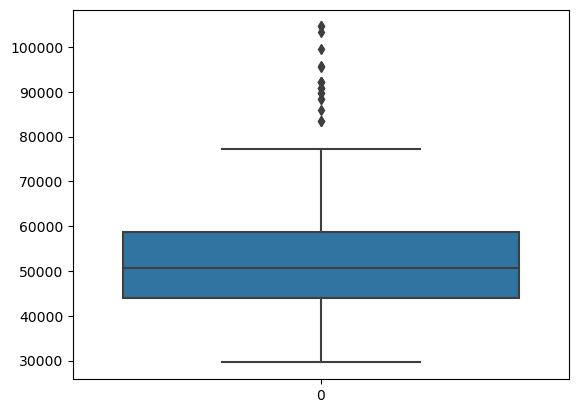

In [77]:
sns.boxplot(df["Income"])

In [78]:
inc_bins = [25000,45000,80000,110000] #range used based on percentile, ranges.
inc_labels = ["low","medium","high"]

In [79]:
df["Income_Segment"] = pd.cut(df["Income"],bins = inc_bins,labels= inc_labels)

In [80]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Segment
0,KP281,18,Male,14,Single,3,4,29562,112,low
1,KP281,19,Male,15,Single,2,3,31836,75,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,low
3,KP281,19,Male,12,Single,3,3,32973,85,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,low


In [81]:
df["Income_Segment"].value_counts()

Income_Segment
medium    112
low        49
high       19
Name: count, dtype: int64

In [82]:
pd.crosstab(df["Income_Segment"],df["Product"],margins=True)

Product,KP281,KP481,KP781,All
Income_Segment,,,,
low,34,15,0,49
medium,46,45,21,112
high,0,0,19,19
All,80,60,40,180


In [83]:
pf_low = np.round((49/180)*100,2)
pf_low

27.22

In [84]:
pf_medium = np.round((112/180)*100,2)
pf_medium

62.22

In [85]:
pf_high = np.round((19/180)*100,2)
pf_high

10.56

## Key findings of purchases by Income Segments include:

- The data indicates that the majority of purchasers are from the medium income segment (62.22%), buying all models with most of the revenue coming from this income group.
- Medium-income customers show a balanced preference for entry-level and mid-level models, with very good interest in advanced models as well.
- Followed by is the low-income customers (27.22%) which have never purchased any advanced model treadmills as per segmentation. Low-income customers predominantly buy entry-level models, followed by mid-level models.
- High-income customers are inclined to purchase only advanced models. They typically avoid buying entry-level and mid-level models possibility due to inclined more on advanced model may come with more features and quality. They are niche customers. 

### Education & Income 

In [86]:
df["Education"].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [87]:
#Education Segmentation

ed_bins = [10,12,16,22]
ed_labels = ["High School","College","Post Graduate"]

df["Ed_Segment"] = pd.cut(df["Education"],bins = ed_bins,labels =ed_labels)

In [88]:
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Segment,Ed_Segment
90,KP481,23,Male,16,Partnered,4,3,45480,127,medium,College
0,KP281,18,Male,14,Single,3,4,29562,112,low,College
169,KP781,30,Male,18,Partnered,5,5,99601,150,high,Post Graduate
59,KP281,33,Female,16,Single,2,2,55713,38,medium,College
108,KP481,26,Female,16,Partnered,4,3,45480,85,medium,College
159,KP781,27,Male,16,Partnered,4,5,83416,160,high,College
4,KP281,20,Male,13,Partnered,4,2,35247,47,low,College
117,KP481,31,Female,18,Single,2,1,65220,21,medium,Post Graduate
85,KP481,21,Male,16,Partnered,2,2,34110,42,low,College
149,KP781,24,Male,16,Single,5,5,49801,160,medium,College


### Correlation of Education and Income

In [89]:
correlation_matrix = df[["Education","Income"]].corr()
print(correlation_matrix)

           Education    Income
Education   1.000000  0.625827
Income      0.625827  1.000000


<Axes: >

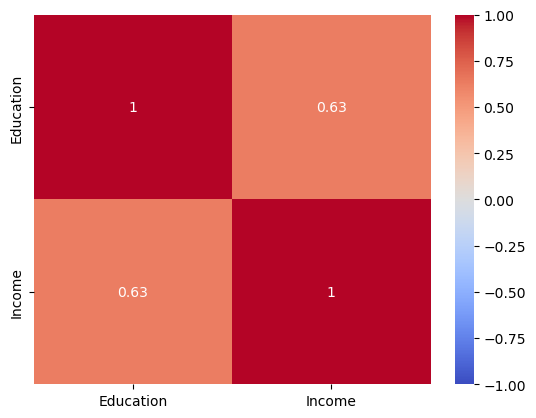

In [90]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: xlabel='Education', ylabel='Income'>

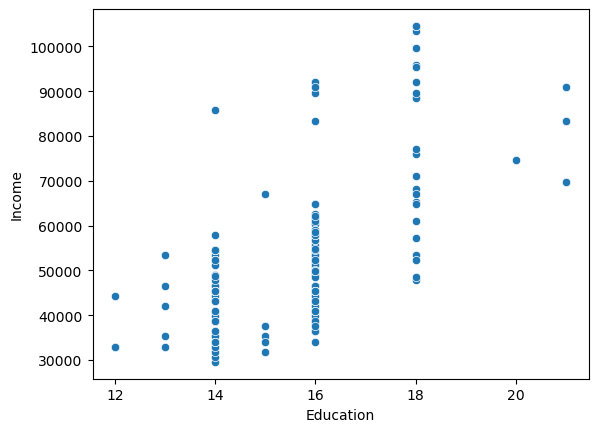

In [92]:
sns.scatterplot(x="Education",y="Income", data = df)

In [93]:
pd.crosstab(df["Ed_Segment"],df["Product"],margins=True)

Product,KP281,KP481,KP781,All
Ed_Segment,,,,
High School,2,1,0,3
College,76,57,17,150
Post Graduate,2,2,23,27
All,80,60,40,180


In [94]:
pf_hs = np.round((3/180)*100,2)
pf_hs

1.67

In [95]:
pf_col = np.round((150/180)*100,2)
pf_col

83.33

In [96]:
pf_pg = np.round((27/180)*100,2)
pf_pg

15.0

## Key findings from the education and correlation matrix

- The correlation matrix shows there its positive correlation between income and education indicating that, the higher the eduction , the higher the income.
- The correlation of 0.625827 between education and income indicates that as education years increase, income tends to increase moderately to strongly.
- From the cross tab, we see only 1.67% of purchases came from the customers at high school
- Clearly the College educated students are dominated with more purchases with 83.33%, majority from the entry level models followed by mid level and good interest on advance models as well.
- Post graduated customers are more leaned towards the advance models with 15% of purchasing contributing. So people with higher education can be targeted for advance models.

In [98]:
df["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

## Cost Part

In [100]:
def cost(x):
    if x == "KP281":
        return 1500
    elif x== "KP481":
        return 1750
    else:
        return 2500

In [101]:
df["Cost"] = df["Product"].apply(cost)

In [102]:
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Segment,Ed_Segment,Cost
151,KP781,25,Male,16,Partnered,4,4,62251,160,medium,College,2500
164,KP781,28,Male,18,Single,6,5,88396,150,high,Post Graduate,2500
29,KP281,25,Female,14,Partnered,2,2,53439,47,medium,College,1500
28,KP281,25,Male,14,Partnered,2,3,45480,56,medium,College,1500
160,KP781,27,Male,18,Single,4,3,88396,100,high,Post Graduate,2500
84,KP481,21,Female,14,Partnered,5,4,34110,212,low,College,1750
132,KP481,37,Female,16,Partnered,2,3,48891,85,medium,College,1750
179,KP781,48,Male,18,Partnered,4,5,95508,180,high,Post Graduate,2500
94,KP481,24,Female,14,Single,3,2,40932,85,low,College,1750
67,KP281,37,Female,16,Partnered,3,3,37521,85,low,College,1500


In [103]:
df.groupby("Product")["Cost"].sum().reset_index()

,Product,Cost
0,KP281,120000
1,KP481,105000
2,KP781,100000


## Key findings from cost:

- As anticipated more revenue is generated from entry level models followed by mid level and advanced model.
- So clearly entry level models are the market leaders as from the income segments we see that low and medium income customers dominated to buty more of entry level models.

## Recommendations Based on Customer Demographics and Purchasing Patterns

**Gender:**

- Entry-Level Models: Maintain a balanced marketing approach to both males and females.
- Mid-Level Models: Increase marketing efforts targeting males, who show a higher purchase rate.
- Advanced Models: Focus marketing heavily on males due to significant dominance in purchases. Introduce new promotions to target more female customers on this models as well. 

**Marital Status:**

- Entry-Level and Mid-Level Models: Prioritize marketing towards partnered individuals, who show higher purchase rates.
- Advanced Models: Continue targeting partnered individuals, as they dominate this segment.

**Age:**

- Age Group 25: Prioritize marketing efforts across all models, especially mid and advanced models.
- Age Group 23: Focus on promoting entry-level and mid-level models.
- Age Group 24: Emphasize advanced models in marketing campaigns.
- Age Group 26: Market evenly across all models with slight emphasis on entry-level models.

**Income:**

- Medium-Income Segment: Continue comprehensive marketing for all models, with an emphasis on advanced models.
- Low-Income Segment: Focus on marketing entry-level and mid-level models; avoid promoting advanced models.
- High-Income Segment: Target marketing exclusively towards advanced models, highlighting premium features and quality.

**Education:**

- High School Education: Minimal focus, as purchases are very low from this group.
- College Education: Major focus on this segment, promoting entry-level and mid-level models, with good representation of advanced models.
- Postgraduate Education: Target advanced models, leveraging the correlation between higher education and higher income.

**General Recommendations:**

- Clearly differentiate between models to effectively cater to specific demographics.
- Customize marketing startegies to align with interests and characteristics of each segment.
- Develop targeted promotions for high-purchasing segments like age group 25, partnered individuals, and college-educated customers.
- Emphasize advanced features in advertising to attract high-income and postgraduate-educated customers.
- Highlight affordability and essential features for low-income and high school-educated customers.
